In [17]:
import pandas as pd

df = pd.read_csv('weatherAUS.csv')
df.shape

(145460, 23)

In [18]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [19]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [20]:
df = df.drop(columns=["Date"])
df = df[df["RainTomorrow"].notna()]
df["RainTomorrow"] = df["RainTomorrow"].map({"Yes": 1, "No": 0})

In [21]:
df["RainToday"] = df["RainToday"].map({"Yes": 1, "No": 0})

In [22]:
df = df.drop(columns=[
    "Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"
])

In [23]:
df = pd.get_dummies(df, columns=[
    "Location", "WindGustDir", "WindDir9am", "WindDir3pm"
], drop_first=True)

In [24]:
df = df.fillna(df.median(numeric_only=True))
# we fill null values with median

In [25]:
X = df.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"]

In [26]:
y.value_counts(normalize=True)

RainTomorrow
0    0.775819
1    0.224181
Name: proportion, dtype: float64

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.array([0, 1]),
    y=y_train
)

class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid"),
])

In [31]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [32]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, class_weight=class_weight_dict)

Epoch 1/20
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 556us/step - accuracy: 0.7285 - loss: 0.5355 - val_accuracy: 0.7823 - val_loss: 0.4623
Epoch 2/20
711/711 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.8045 - loss: 0.4289 - val_accuracy: 0.7895 - val_loss: 0.4524
Epoch 3/20
711/711 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.8110 - loss: 0.4163 - val_accuracy: 0.7970 - val_loss: 0.4392
Epoch 4/20
711/711 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.8164 - loss: 0.4049 - val_accuracy: 0.7929 - val_loss: 0.4438
Epoch 5/20
711/711 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.8170 - loss: 0.4003 - val_accuracy: 0.8117 - val_loss: 0.4118
Epoch 6/20
711/711 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.8228 - loss: 0.3889 - val_accuracy: 0.8184 - val_loss: 0.4011
Epoch 7/20
711/711 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.8247 - loss: 0.3833 - val_accuracy: 0.8232 - val_loss: 0.3885
Epoch 8/20
711/711 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.8300 - loss: 0.3749 - 

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

889/889 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - accuracy: 0.8113 - loss: 0.4250
Test accuracy: 0.8075178265571594


In [34]:
y_prob = model.predict(X_test)
y_pred = (y_prob >= 0.5).astype(int)

889/889 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step


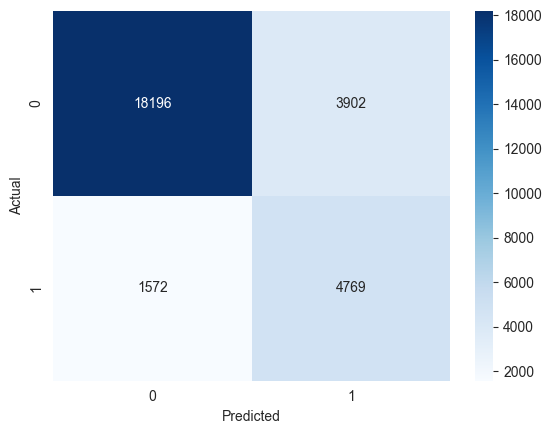

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87     22098
           1       0.55      0.75      0.64      6341

    accuracy                           0.81     28439
   macro avg       0.74      0.79      0.75     28439
weighted avg       0.84      0.81      0.82     28439

